In [5]:
import skimage.io as io
import skimage.color as clr
import matplotlib.pyplot as plt
from pathlib import Path
import collections
import numpy as np
from collections import defaultdict


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path='/content/drive/MyDrive/DIP/Assignment01/'
img=io.imread(path+'input/Coins.png',as_gray=True)

In [7]:
# input gray image and bins  return  frequency and bin number
def hist( gray_img , bins ):
    jump=np.floor(256/bins)
    histogram = np.zeros(256) 
    bin_centers=[0]
    for i in range(1,bins+1):
      bin_centers.append(bin_centers[i-1]+jump)
    for i in gray_img.ravel():
      histogram[i]+=1

    freq=np.zeros(len(bin_centers)-1)
    for i in range(1,bins+1):
      sum=0
      for q in range(int((i-1)*jump),int(i*jump)):#range(int(bin_centers[i]-jump),bin_centers[i]):#range(int((i-1)*jump),int(i*jump)):
        sum+=histogram[q]
      freq[i-1]=sum

    bc=np.zeros(len(bin_centers)-1)
    for i in range(0,bins):
      bc[i]=(bin_centers[i]+bin_centers[i+1])/2
    
    t=np.histogram(img.ravel(),bins=bins,range=(0,256))
    inbuilt_freq,inbuilt_bin=t[0],t[1]
    return (bc,freq,inbuilt_freq)

In [10]:
bc,freq,ifreq=hist(img,256)
print(f'Differnce Between frequency of implemented function and inbuilt is {freq-ifreq}')

Differnce Between frequency of implemented function and inbuilt is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


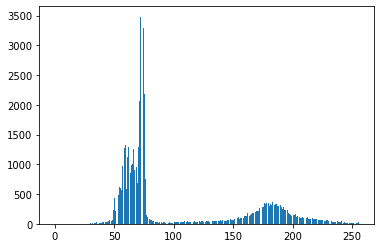

In [9]:
plt.bar(bc,freq)
plt.savefig(path+'output/Q1_hist.png',width=.5)

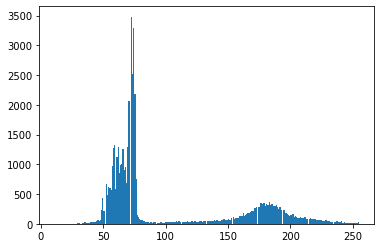

In [11]:
plt.hist(img.ravel(),bins=256)
plt.savefig(path+'output/Q1_inbuilt_hist.png')